# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Boston housing dataset has 489 data points with 4 variables each.


/opt/conda/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


**Note:**

NumPy is the fundamental package for scientific computing with Python. It contains among other things:
- A powerful N-dimensional array object
- Sophisticated (broadcasting) functions
- Tools for integrating C/ C++ and Fortran code
- Useful linear algebra, Fourier transform, and random number capabilities


Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.

## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price)) 
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


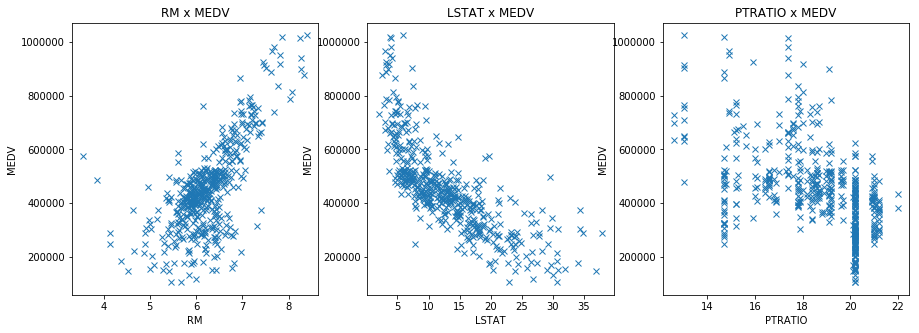

In [3]:
#Data Visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    plt.plot(data[col], prices, 'x')
    plt.title('%s x MEDV' % col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


- Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer:**

- RM: The average number of rooms among homes in the neighborhood
>- I expect an increase in the "RM" value will lead to an increase in the value of "MEDV."
>- A higher number of RM means there are more rooms in a home, which implies a potentially higher floor area. A bigger house, by intuition, should be more costly.

- LSTAT: The percentage of homeowners in the neighborhood considered "lower class" (working poor)
>- I expect an increase in the "LSTAT" value will lead to a decrease in the value of "MEDV."
>- People from the lower class are not likely to be able to afford high housing prices; the market cannot sustain the higher rates. Therefore, home values should have a negative correlation with LSTAT.

- PTRATIO: The ratio of students to teachers in primary and secondary schools in the neighborhood
>- I expect an increase in the "PTRTIO" will lead to a decrease in the value of "MEDV."
>- Schools with lower students/ teachers ratio tend to allow each teacher to pay more attention to individual students, which implies that students will receive an education with better quality. A good comparison in the real world is private and public schools. The former usually has a lower PTRATIO and therefore, charge higher tuition fees compared to the later one.


**Note:**

Intuition about the features in any ML problem could a good/ quick start, but a more thorough method is a better approach since its conclusions are based on the data relations between features and label. In here, the algorithm of **linear regression** seems to be an efficient way to verify our intuitions. The following graphs further reinforce my guesses.

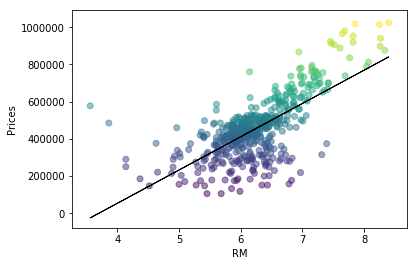

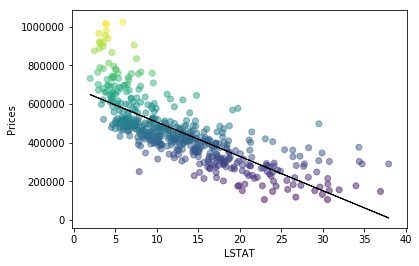

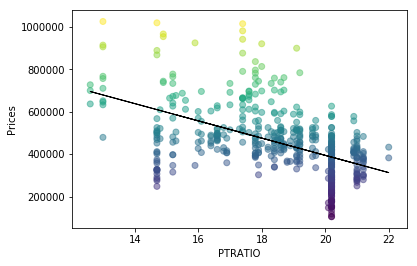

In [4]:
from sklearn.linear_model import LinearRegression

def linear_regression(data, feature_name):
    X = data[feature_name].values.reshape(-1, 1)
    y = prices
    
    model = LinearRegression()    
    model.fit(X,y)
    
    y_pred = model.predict(X)
    
    plt.plot(X, y_pred, linewidth=1, color='black')
    plt.scatter(X, y, alpha=0.5, c=prices)
    plt.xlabel(feature_name)
    plt.ylabel('Prices')
    plt.show()
    
linear_regression(data, 'RM')
linear_regression(data, 'LSTAT')
linear_regression(data, 'PTRATIO')

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [5]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [6]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

**Hint:**  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**

I do consider this model to have successfully captured the variation of the target variable because of the following reasons:
- R2 score is 0.923. R2 score is between 0 and 1; therefore, a score of 0.923 is very high.
- This implies 92.3% of the variance in the true data set is predictable from the prediction data set.
- The results indicate that there is a very strong correlation between the dependent variable and the independent variable.


**Note:**

- The size of the samples is very limited; there are only five data points in the dataset for testing the model performance. Hence the conclusion is not solid enough from the statistical perspective. Adding more data points would allow us to be more confident in the testing results.
- The comparison between the true values and the predictions is plotted as the following graph.

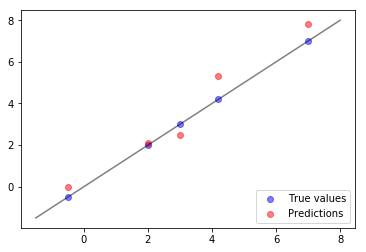

In [7]:
# Plot ture values
true= [3, -0.5, 2, 7, 4.2]
true_plot = plt.scatter(true, true, alpha=0.5, color='blue', label='True values')

# Plot predictions
pred = [2.5, 0.0, 2.1, 7.8, 5.3]
pred_plot = plt.scatter(true, pred, alpha=0.5, color='red', label='Predictions')

# Reference line
fit = np.poly1d(np.polyfit(true, true, 1))
lims = np.linspace(min(true)-1, max(true)+1)
plt.plot(lims, fit(lims), alpha=0.5, color='black')

# Legend and show
plt.legend(handles=[true_plot, pred_plot], loc='lower right')
plt.show()

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [8]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=50)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer:**

The reason for splitting a dataset into training and testing sets is to determine how well our model is doing; the main goal is to accurately predict new unseen data. A reasonable estimate of our generalization accuracy can be obtained by running models on this testing dataset. And correct that we can try and protect against overfitting with this independent dataset.

We will get the maximum accuracy by training and testing with the same data set; however, the model will be overly complex. The overfitting model is not able to generalize well but simply remember all the data. On the other hand, by splitting the data, the model can be trained and then tested on different data. The testing accuracy can be a better estimate than training accuracy of out-of-sample performance.

However, by simply adopting the train/ test split, the error of high variance may occur. Changing which observations to be categorized as part of the testing set can significantly change the testing accuracy. Therefore, k-fold cross-validation or shuffleSplit should be introduced to solve this issue.

**Note:**

The benefit of splitting a dataset into training and testing subsets is that the training set can be used to train a model while the testing set can be used to estimate how well a model generalizes to previously unseen data. A model that is overfitting the data may perform well on the training set but its generalization error (which is calculated using the testing set) will be high. A model that is underfitting neither will perform well on the training set nor generalize well. This allows estimating how well a model generalizes before launching it in production.

The training set is bigger than the testing set because a model trained on a bigger dataset is most likely to perform better than one trained on a smaller one. A higher training set may also prevent a model from overfitting (because the model will be trained on different training examples).

The data should be split into training and testing subsets randomly to prevent bias in the order of the data points.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

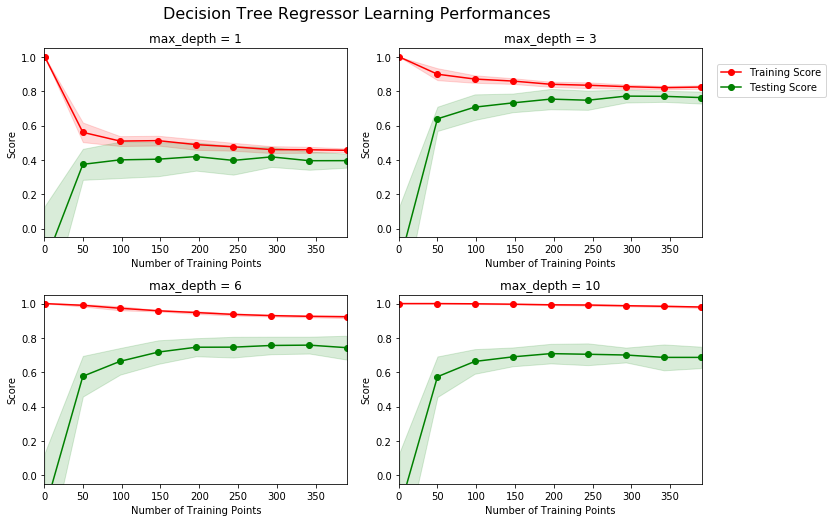

In [9]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer:**
- Model: max_depth = 1 (Underfitting, high bias)
    - Training points <= 300 (Before convergence)
        - Score of the **Training Curve** becomes **lower** as more training points are added.
        - Score of the **Testing Curve** becomes **higher** as more training points are added.
        - Having more training points make the model **more accurate** since the score of testing curve increases along with the increase of training points.
    - Training points > 300 (After convergence)
        - Score of the **Training Curve** converges with the score of testing curve when the training points increase. The score value tends to become a **stable value**.
        - Score of the **Testing Curve** converges with score the of traing curve when the training points increase. The score value tends to become a **stable value**.
        - There is no significant benefit since the score of the testing curve stays the same when the number of training points increases.  As in the beginning it is beneficial, but at the end if we look at the testing curve here, we can see that it has converged to its optimal score, so more data is not necessary.
    
    
- Model: max_depth = 3 (Just right)
    - Training points <= 300 (Before convergence)
        - Score of the **Training Curve** becomes **lower** as more training points are added.
        - Score of the **Testing Curve** becomes **higher** as more training points are added.
        - Having more training points make the model **more accurate** since the score of testing curve increases along with the increase of training points.
    - Training points > 300 (After convergence)
        - Score of the **Training Curve** converges with the score of testing curve when the training points increase. The score value tends to become a **stable value**.
        - Score of the **Testing Curve** converges with the score of traing curve when the training points increase. The score value tends to become a **stable value**.
        - There is no significant benefit since the score of the testing curve stays the same when the number of training points increases.  As in the beginning it is beneficial, but at the end if we look at the testing curve here, we can see that it has converged to its optimal score, so more data is not necessary.
    
    
- Model: max_depth = 6 (Overfitting, high variance)
    - Training points <= 250 (Before both the the scores become stable)
        - Score of the **Training Curve** becomes **lower** as more training points are added.
        - Score of the **Testing Curve** becomes **higher** as more training points are added.
        - Having more training points make the model **more accurate** since the score of testing curve increases along with the increase of training points.
    - Training points > 250 (After both the the scores become stable)
        - Score of the **Training Curve** tends to become a stable value. This value will **higer** than the score of testing curve.
        - Score of the **Testing Curve** tends to become a stable value. This value will **lower** than the score of testing curve.
        - There is no significant benefit since the score of the testing curve stays the same when the number of training points increases.  As in the beginning it is beneficial, but at the end if we look at the testing curve here, we can see that it has converged to its optimal score, so more data is not necessary.
    
    
- Model: max_depth = 10 (Overfitting, high variance)
    - Training points <= 200 (Before both the the scores become stable)
        - Score of the **Training Curve** tends to become a stable value. This value will **higer** than the score of testing curve.
        - Score of the **Testing Curve** tends to become a stable value. This value will **lower** than the score of testing curve.
        - Having more training points make the model **more accurate** since the score of testing curve increases along with the increase of training points.
    - Training points > 200 (After both the the scores become stable)
        - Score of the **Training Curve** as more training points are added:
        - Score of the **Testing Curve** as more training points are added:
        - There is no significant benefit since the score of the testing curve stays the same when the number of training points increases.  As in the beginning it is beneficial, but at the end if we look at the testing curve here, we can see that it has converged to its optimal score, so more data is not necessary.
        
The model which is trained with a maximum depth of 1 suffers from high bias because it performs well neither on the training nor on the validation set. The graph indicates this by showing that training and validation scores are low (close to 0.4) and both training score and validation score curves are close to one another.

The model which is trained with a maximum depth of 10 suffers from high variance because it performs really well on the training set but its performance on the validation set is not as high. This can be seen in the complexity graph by looking at the big gap between the training score and validation score curves. The training score is close to 1.0 while the validation score is less than 0.7.
        
**Note:**

- As in the initial phases, the training score decreasing and testing score increasing makes sense, since with little amounts of the data we simply memorize the training data(no generalization), then when we receive more and more data points we can't simply memorize the training data and we start to generalize better(higher testing accuracy).

- In practice, collecting more data can often be time-consuming and/ or expensive, so when we can avoid having to collect more data the better. Therefore, sometimes receiving very minor increases in performance is not beneficial, which is why plotting these curves can be very critical at times.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

**Run the code cell below and use this graph to answer the following two questions Q5 and Q6.**

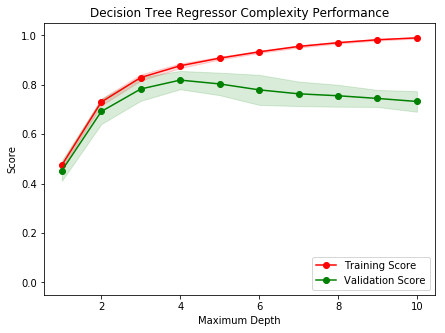

In [10]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer:**

- Model: max_depth = 1
    - High bias (underfitting)
    - Low training and testing scores
    - A max_depth of 1 suffers from high bias, visually this is due to the low training score (also note that it has low variance since the scores are close together). As this model is not complex enough to learn the structure of the data.
    
    
- Model: max_depth = 10
    - High variance (overfitting)
    - High training score, but low tsting score
    - A max_depth of 10 suffers from high variance, since we see a large gap between the training and validation scores, as we are basically just memorizing our training data and will not generalize well to new unseen data.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

**Hint:** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer:**   
    
 - Model: max_depth = 4
    - Just right
    - Two curves are about to split.
    - The validation score reaches its highest value here; the score is going to be lower once again afterware.
    - Rather high training and testing scores
    - As we are looking for the highest validation score (which is what gridSearch searches for). And we are also looking for a good bias/ variance tradeoff (with close training and validation scores).

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

**Hint:** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer:**

"Make a table, think all the possibilities, and pick the best one." The grid search technique is best for improving the model by determining the best combination of its parameters. The meaning of "Grid" can be elaborated by the following example. And, we are not restricted to using F1 score as our evaluation metric when optimizing a model with the technique of grid search, as we can use any evaluation metric we please.

In here, I am taking the support vector machine (SVM) as an instance. The model has multiple hyper-parameters, such as kernel and gamma. And the grid search will help us to pick the best combination for the hyper-parameters. Please see the chart for more information. What is noteworthy here is that while choosing the value of gamma, it is better to do it exponentially.

| Gamma\kernel | Linear | Polynomial |
| :-------------: | :--------: | :--------: |
| 0.1 | F1 Score = 0.5 | F1 Score = 0.2 |
| 1 | F1 Score = 0.8 | F1 Score = 0.4 |
| 10 | F1 Score = 0.6 | F1 Score = 0.6 |

We can see that when Gamma = 1 and Kernel = Linear the score is the highest. Therefore, we can determine the best combination for the model.

In the following steps,  we will use max depth, a decision tree, and R2 score. We will pass ten different values, from 1 to 10, for 'max_depth' to grid search, meaning, we will ask to run the decision tree regression for each value of 'max_depth.' Therefore, we will firstly fit the decision tree regression model with max_depth = 1, and evaluate the model based on our scoring function (R2 score in this case) based on our train/ validation data (which is ten sets of train/ validation data produced using the ShuffleSplit method). Then we will do the same for a max depth = 2 and so on. And at the end, we will be returned the highest scoring max depth for the validation set.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer:**

The k-fold is a way to validate the parameters you've chosen for your model. It divides the trainset in k subsets and train the model in k-1 of them and evaluate it in the left set. To make it a stronger measure, it'll repeat the process k times, using a different subset from the k ones as the evaluation one, finally, takes the mean of the score used to evaluate the hyperparameters used in the k-fold cross-validation.

- K-fold cross-validation procedure [1]
  - Cross-validation is a re-sampling procedure used to evaluate machine learning models on a limited data sample.
  - The procedure has a single parameter, K, which refers to the number of groups that a given data sample is to be split into.
  - General procedure
    - Shuffle the dataset randomly
    - Split the dataset into k groups
    - For each unique group
      - Take the group as a holdout or test data set
      - Take the remaining groups as a training data set
      - Fit a model on the training set and evaluate it on the test set
      - Retain the evaluation score and discard the model
    - Summarize the skill of the model using the sample of model evaluation scores
- Pros [2]
  - Reduce bias
  - Every data points get to be tested once and are used in training k-1 times.
  - The variance of the resulting estimate is reduced as k increases.
  - Validation itself (it would be an advantage even with a single validation set), that keeps the test set really unseen. If we optimize the hyperparameters using an evaluation measure in the test set, it would kind leak information to the model, we may overfit the parameters to the test set because we're choosing them looking for a measure in it. And that's not good! The final result, the model assessment will be compromised, it would overestimate the generalization power of our model.
  - The k-fold makes a robust measure taking the mean of a measure in different validation sets. The greater the k, more robust the measure.
  - It's a good technique to use when we don't have many data points and couldn't split the data into a single and big validation set.
- Cons [2]
  - Computationally intensive since the algorithm has to be rerun for k times.

**Note:**

- While doing parameter tuning on **ONLY** one training/ testing data split, there is a risk that we threw away the data could be useful for training the model. The model will be vulnerable to high bias as well.
- On the other hand, in K-fold cross-validation, each observation in the data sample is assigned to an individual group and stays in that group for the duration of the procedure. This means that each sample is allowed to be used in the holdout set 1 time and used to train the model k-1 times. [1]
- The following graph shows the procedure of K-fold cross-validation when K = 10.

**References (denoted through the use of square brackets and numbering):**

1. [A Gentle Introduction to k-fold Cross-Validation](https://machinelearningmastery.com/k-fold-cross-validation/)
2. [K fold and other cross-validation techniques](https://medium.com/datadriveninvestor/k-fold-and-other-cross-validation-techniques-6c03a2563f1e)


In [11]:
%%html
<img src="images/K-fold.png">

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [12]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import  GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state = 42)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid_obj = GridSearchCV(estimator=regressor,param_grid=params,scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid_fit = grid_obj.fit(X, y)

    # Return the optimal model after fitting the data
    return grid_fit.best_estimator_

/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [13]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


**Hint:** The answer comes from the output of the code snipped above.

**Answer:**


The optimal model has a maximum depth of 4, which perfectly matches the optimal number of maximum depth generated from the graph of decision tree regressor complexity performance.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [14]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $404,911.11
Predicted selling price for Client 2's home: $212,223.53
Predicted selling price for Client 3's home: $938,053.85


**Answer:**

The predictions align with the feature observation. Also see the following graphs for the data visualization.

- Predicted selling price for Client 1's home: $404,911.11
    - The middle one among the three
        - Middle size home
        - Middle neighborhood poverty level
        - Middle student-teacher ratio of nearby schools
    
    
 - Predicted selling price for Client 2's home: $212,223.53
    - The cheapest among the three
        - Smallest home
        - Higest neighborhood poverty level
        - Higest student-teacher ratio of nearby schools
    
    
 - Predicted selling price for Client 3's home: $938,053.85
    - The most pricy one among the three
        - Biggest home
        - Lowest neighborhood poverty level
        - Lowest student-teacher ratio of nearby schools

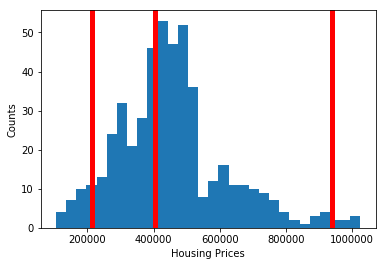

In [15]:
plt.hist(prices, bins = 30)
plt.xlabel('Housing Prices')
plt.ylabel('Counts')

for price in reg.predict(client_data):
    plt.axvline(price, lw = 5, c = 'r')

**Note:**

We can further compare them to the descriptive stats of the housing prices. The comparison provides a more solid idea on the model predictions.

- Predicted selling price for Client 1's home: $404,911.11
    - The middle one among the three
        - RM: Bottom 25% (5 rooms)
        - LSTAT: Bottom 25-50% (17%)
        - PTRATIO: Top 25% (15-to-1)
    
    
 - Predicted selling price for Client 2's home: $212,223.53
    - The cheapest among the three
        - RM: Bottom 25% (4 rooms)
        - LSTAT: Bottom 25% (32%)
        - PTRATIO: Bottom 25% (22-to-1)
    
    
 - Predicted selling price for Client 3's home: $938,053.85
    - The most pricy one among the three
        - RM: Top 25% (8 rooms)
        - LSTAT: Top 25% (3%)
        - PTRATIO: Top 25% (12-to-1)

The stats are shown as the following table:

In [16]:
features.describe()

,RM,LSTAT,PTRATIO
count,489.000000,489.000000,489.000000
mean,6.240288,12.939632,18.516564
std,0.643650,7.081990,2.111268
min,3.561000,1.980000,12.600000
25%,5.880000,7.370000,17.400000
50%,6.185000,11.690000,19.100000
75%,6.575000,17.120000,20.200000
max,8.398000,37.970000,22.000000


The following boxes indicate how the Client's features compare to the interquartile range, median, and whiskers.

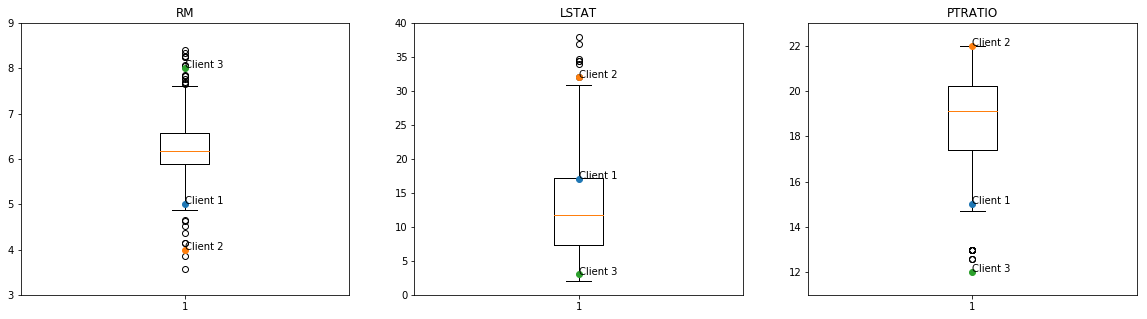

In [17]:
plt.figure(figsize=(20, 5))
y_ax = [[3,9],[0,40],[11,23]]

for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    plt.boxplot(data[col])
    plt.title(col)
    
    for j in range(3):
        plt.plot(1, client_data[j][i], marker="o")
        plt.annotate('Client '+str(j+1), xy=(1,client_data[j][i]))
        plt.ylim(y_ax[i])


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [18]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer:**

I do not think this constructed model should be used in a real-world setting nowadays. Here are some reasons:

 - The data is collected from 1978 and the price of the house is not escalated to today's dollar. It is very hard to believe that a house with 8 rooms will cost lesser a million in an urban city of Boston per the above prediction.
 - There are certainly more features should be captured on top of the three we are having right now. For example, factors such as distance to public facilities, society criminal rate, and air and sound quality will affect the housing price as well.
 - Data collected in an urban city like Boston should never be used for predicting the case in a rural city just because the factors to determine the housing price are so different.
 - It is not fair to judge a specific home based on the characteristics of its entire neighborhood. However, the model is still able to give us an general idea about how the housing market will look like in that area. As a result, even though it is not fair to use the entire neighborhood to predict a single home, it is also not fair to say that the model is totally useless.


Even though the dataset is quite old, probably doesn't capture enough about housing features, and the range in predictions are quite large, I still think the model is relatively robust. The standard deviation of the above 10 trials equals to $20,970.30 and the coefficient of variation equals to 5.18%. Both of the numbers are comparatively low, which means the predictions are rather consistent.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.